
# USER ONBOARDING ANALYSIS #
This analysis is focused on understanding the user onboarding process of a SaaS platform similar to Zoom. However, it is important to note that the dataset used for this analysis is fictional and does not represent actual user data from real-world SaaS platform. The variables and their definitions are meant to serve as an example of the type of user-level data that a SaaS company might track to understand its users' onboarding lifecycle and engagement.

Since this is a hypothetical scenario, the data used in this analysis is dummy data, not real user data. The purpose is to demonstrate the types of insights that can be derived from such a comprehensive user dataset, rather than to present findings about a specific real-world SaaS platform.

The key objectives of this analysis are:

***User Onboarding and drop-off points***: Examining the user registration, email verification, profile setup, and tutorial completion processes to identify areas for optimization and improving the onboarding experience.

***User Engagement and Feature Adoption***: Tracking the user's interactions with core features, such as accessing introductions, starting and completing feature tutorials, and taking their first action on the platform. This will help understand feature usage and identify opportunities to drive deeper engagement.

***User Support and Self-Service***: Analyzing the user's interactions with the platform's support resources, including page views on the "Getting Started," "Account Management," "Audio and Video," and "Integration" sections. This can provide insights into the user's support needs and areas for improvement in the self-service experience.

***User Segmentation and Differentiation***: Exploring user characteristics, such as demographics, signup source, and subscription type, to identify distinct user segments and understand how their behaviors and engagement patterns may differ.

By analyzing this comprehensive, but fictional, dataset, the aim is to gain a deep understanding of the user lifecycle, pinpoint areas for improvement in the user experience, and develop strategies to drive user acquisition, activation, engagement, and retention for the SaaS platform.

The findings from this analysis can inform product roadmaps, marketing strategies, and customer success initiatives to enhance the overall user experience and foster long-term loyalty and growth for the SaaS platform. However, it's important to remember that these insights would need to be validated against real user data before being applied to a live product or business.

_This analysis will be divided into the following sections_:

### Questions:

- Drop-off stages: Analyze at which stage users are dropping off the most, e.g. profile setup, tutorial completion, firt action taken etc.. This analysis is done through calculation of completion rates of each stage.

- User stuck points: Identify steps where users are starting but not completing, e.g. email verification, completed tutorials, feature intros.

- Steps duration analysis : Examine how long users take to complete different steps.

- Support usage: Analyze which support pages are viewed most frequently. This can indicate areas users need more guidance.

- Segmentation analysis: Break down drop-off rates by user demographics, signup sources and subscription types. This can uncover targeted ways to optimize onboarding.

### Hypothesis Testing:
   
* Relationship between User Type and Tutorial Duration 
    
* Relationship between User Type and First action taken

* Relationship between User Type and Signup Source

* Difference in Tutorial Duration between User Segments


## Definitons of Variables:
* ***user_id***: A unique identifier for each user of the SaaS platform.
* ***is_new_user***: A boolean flag indicating whether the user is a new user (1) or an existing user (0).
* ***registration_date***: A timestamp representing the date and time when the user registered for the SaaS platform.
* ***tutorial_accessed***: A timestamp indicating whether the user has accessed the platform's tutorial and when they did so.
* ***Account Creation Initiated***: A timestamp indicating whether the user has initiated the account creation process and when they did so.
* ***Email Verification Initiated***: A timestamp indicating whether the user has initiated the email verification process and when they did so.
* ***Email Verification Completed***: A timestamp  indicating whether the user's email has been successfully verified.
* ***Profile Setup Started***: A timestamp indicating whether the user has started the profile setup process and when they did so.
* ***Profile Setup Completed***: A timestamp indicating whether the user has completed the profile setup process.
* ***Tutorial Completed***: A timestamp indicating whether the user has completed the platform's tutorial.
* ***First Featured Introduction***: A timestamp indicating whether the user has been introduced to the platform's featured functionality and * when they were introduced.
* ***Feature Tuto Started***: A timestamp indicating whether the user has started a feature tutorial and when they did so.
* ***Feature Tuto completed***: A timestamp indicating whether the user has completed a feature tutorial.
* ***First Action Taken***: A timestamp indicating whether the user has taken their first action on the platform.
* ***Secondary Feature Introduction***: A boolean flag indicating whether the user has been introduced to a secondary feature of the platform.
* ***Secondary Feature Interaction***: A boolean flag indicating whether the user has interacted with a secondary feature and when they did so.
* ***Getting Started Page Views (Support)***: A count of the number of times the user has viewed the "Getting Started" page in the platform's support section.
* ***Account Management Page Views (Support)***: A count of the number of times the user has viewed the "Account Management" page in the platform's support section.
* ***Audio and Video Page Views (Support)***: A count of the number of times the user has viewed the "Audio and Video" page in the platform's support section.
* ***Integration Page Views (Support)***: A count of the number of times the user has viewed the "Integration" page in the platform's support section.
* ***Demographics***: An object containing information about the user's location (US, UK, Europe, Japan, Australia).
* ***Signup Source***: An object containing information about the source of the user's signup (social media, website, ads, referral).
* ***Subscription Type***: An object containing information about the user's subscription type (Basic, Pro, Business, Entreprise).
* ***Feedback Provided***: An integer value representing the user's feedback score (from 0 to 5).

## Importing Data and necessary libraries ##

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
from random import seed
from random import randint
import scipy.stats as stats
from scipy.stats import chi2_contingency, f_oneway, pearsonr, ttest_ind 
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [28]:
df = pd.read_excel(r'C:\Users\Yassine Ben El Haj\Desktop\mydata.xlsx') 

## Data Pre-processing ##

In [29]:
# Exploring the data

df.describe(include=["object", "bool", "datetime"])

df.count()
df.info
### Rename some columns for better readability 

df.rename(columns={'Account Creation Initiated' : 'account_creation_initiated',
       'Registration Date' : 'reg_date', 'Email Verification Started': 'email_verification_sta',
       'Email Verification Completed' : 'email_verification_com', 'Profile Setup Started': 'profile_setup_sta',
       'Profile Setup Completed': 'profile_setup_com', 'Feature Tutorial Started': 'feature_tuto_sta',
       'Feature Tutorial Completed': 'feature_tuto_com', 'First Feature Introduction': 'first_feat_intro',
       'First Action Taken': 'first_act_tak','Getting Started Page Views': 'getting_sta', 'Account Management Page Views': 'acc_manag',
       'Audio and Video Page Views': 'aud_vid', 'Integration Page Views': 'integration', 'Demographics': 'geographics',
       'Signup Source': 'sign_source', 'Subscription Type': 'sub_type'}, inplace=True
       )

### Checking & Removing Duplicates ###
df.duplicated()

# Checking for duplicated User Ids
df['user_id'].duplicated()  

# Sort by Registration date (ascending)
sorted_df = df.sort_values(by='reg_date', ascending= True)  

# Dropping the duplicated User Ids and keep only the first registred user ids
user_df = sorted_df.drop_duplicates(subset='user_id', keep='first')

### Checking for missing values

df.isnull().sum()

## COMMENT: 
# In our dataset, the missing values are primarily related to timestamps.
# In this analysis context, they are representing different user actions,
# such as email verification, profile setup, feature tutorial completion, and so on
# Leaving them empty preserves the original data and avoids bias from imputing values or dropping rows. 
# This transparency (users with/without actions) allows for easier analysis and filtering based on engagement.



user_id                         0
is_new_user                     0
account_creation_initiated      0
reg_date                        0
email_verification_sta          0
email_verification_com        238
profile_setup_sta             238
profile_setup_com             238
feature_tuto_sta              238
feature_tuto_com              594
first_feat_intro              594
first_act_tak                 654
sec_fea_intro                   0
sec_fea_interaction             0
getting_sta                     0
acc_manag                       0
aud_vid                         0
integration                     0
geographics                     0
sign_source                     0
sub_type                        0
feed_score                      0
dtype: int64

In [30]:
df.head(5)

,user_id,is_new_user,account_creation_initiated,reg_date,email_verification_sta,email_verification_com,profile_setup_sta,profile_setup_com,feature_tuto_sta,feature_tuto_com,...,sec_fea_intro,sec_fea_interaction,getting_sta,acc_manag,aud_vid,integration,geographics,sign_source,sub_type,feed_score
0,user_531,1,1,2024-01-30,2024-01-30 00:03:04.745,NaT,NaT,NaT,2023-10-03 01:00:40.460,NaT,...,1,1,16,15,16,1,JAPAN,Social Media,Basic,0
1,user_776,1,1,2023-10-03,2023-10-03 00:02:21.852,2023-10-03 00:07:37.754,2023-10-03 00:20:10.990,2023-10-03 00:37:29.440,2023-10-31 01:10:54.192,2023-10-31 01:40:35.638,...,1,1,19,1,23,7,EUROPE,Advertisement,Pro,0
2,user_919,0,1,2023-10-31,2023-10-31 00:04:39.465,2023-10-31 00:14:26.547,2023-10-31 00:28:26.463,2023-10-31 00:48:00.179,2023-08-14 00:57:43.253,NaT,...,1,0,11,10,20,8,UK,Advertisement,Basic,4
3,user_723,0,1,2023-08-14,2023-08-14 00:04:08.268,2023-08-14 00:11:54.352,2023-08-14 00:22:05.355,2023-08-14 00:37:26.580,2023-09-13 01:03:48.684,2023-09-13 01:30:08.440,...,1,0,6,13,19,10,JAPAN,Website,Business,5
4,user_213,0,1,2024-03-11,2024-03-11 00:03:06.671,NaT,NaT,NaT,2024-02-23 01:03:24.844,NaT,...,0,1,16,5,7,7,UK,Social Media,Enterprise,4


## Visualization of New and Returning Users Over Time ##

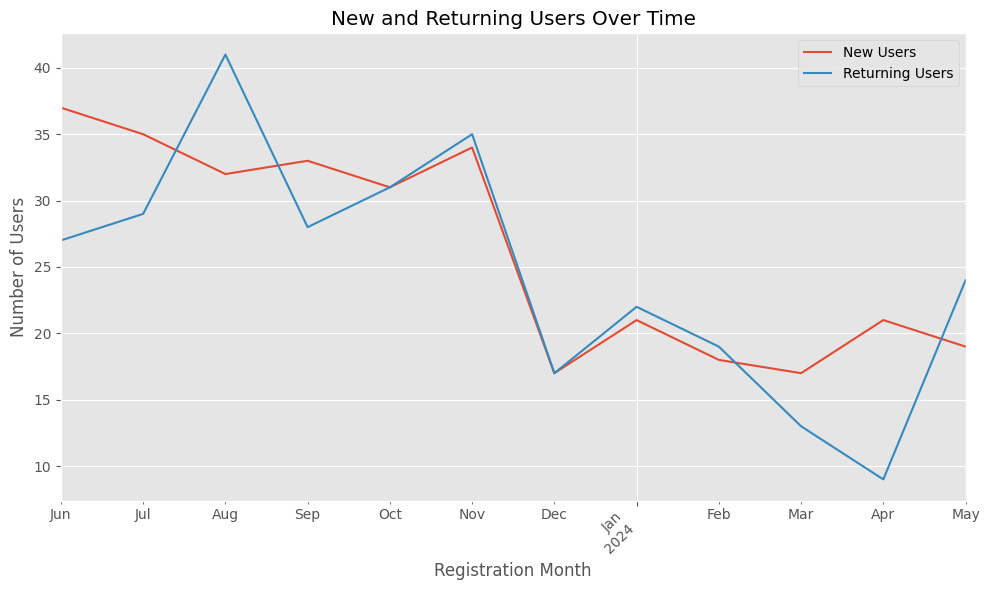

In [62]:

new_users_by_month = user_df.groupby(pd.to_datetime(user_df['reg_date']).dt.to_period('M'))['is_new_user'].sum()
returning_users_by_month = user_df.groupby(pd.to_datetime(df['reg_date']).dt.to_period('M'))['is_new_user'].count() - new_users_by_month

# Create the time series chart
fig, ax = plt.subplots(figsize=(10, 6))
new_users_by_month.plot(kind='line', ax=ax, label='New Users')
returning_users_by_month.plot(kind='line', ax=ax, label='Returning Users')

plt.title('New and Returning Users Over Time')
plt.xlabel('Registration Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# Visualize User type distribution

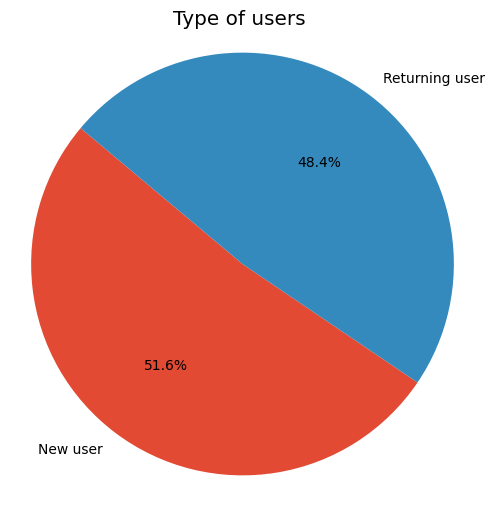

In [33]:
def pie_chart(is_new_user):
  user_counts = user_df[is_new_user].value_counts().reset_index()
  user_counts.columns = ['User Type', 'Count']
  user_counts['User Type'] = user_counts['User Type'].replace({1: "New user", 0: "Returning user"})
  
  plt.figure(figsize=(6,6))
  plt.pie(user_counts['Count'], labels=user_counts['User Type'], autopct='%1.1f%%', startangle=140)
  plt.title(f'Type of users ')
  plt.axis('equal')
  plt.show()

pie_chart('is_new_user')

In [34]:
df.columns

Index(['user_id', 'is_new_user', 'account_creation_initiated', 'reg_date',
       'email_verification_sta', 'email_verification_com', 'profile_setup_sta',
       'profile_setup_com', 'feature_tuto_sta', 'feature_tuto_com',
       'first_feat_intro', 'first_act_tak', 'sec_fea_intro',
       'sec_fea_interaction', 'getting_sta', 'acc_manag', 'aud_vid',
       'integration', 'geographics', 'sign_source', 'sub_type', 'feed_score'],
      dtype='object')

In [35]:
selected_columns= ['is_new_user', 'email_verification_sta',
                   'email_verification_com', 'profile_setup_sta',
                   'profile_setup_com', 'feature_tuto_sta', 'feature_tuto_com',
                   'first_feat_intro', 'first_act_tak', 'sec_fea_intro',
                   'sec_fea_interaction', 'getting_sta', 'acc_manag', 'aud_vid',
                   'integration', 'geographics', 'sign_source', 'sub_type', 'feed_score']


df_subset = user_df.loc[:,selected_columns]

#converting categorical columns to num using one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns= ['geographics', 'sign_source', 'sub_type'])
#correlation table
visual_columns = df_encoded.columns
correlation_matrix = df_encoded[visual_columns].corr()


## Visualize the correlation matrix 

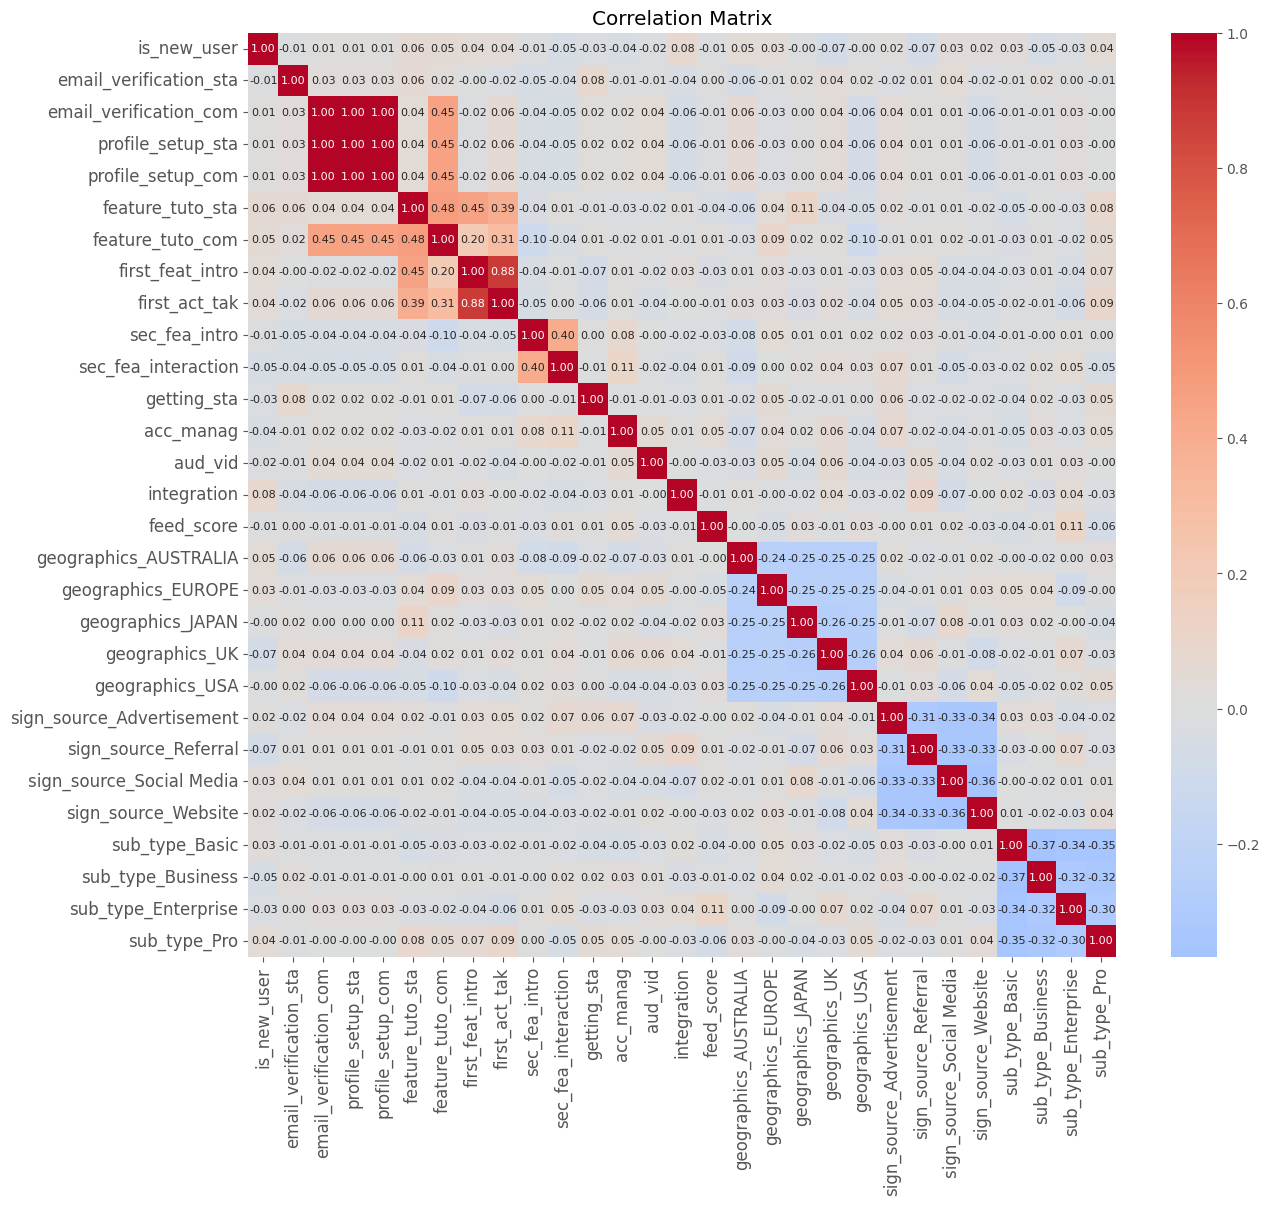

In [36]:
plt.figure(figsize= (14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', center=0, annot_kws={"size": 8}, fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize= 12)                                                                             
plt.show()

## Visualize user Geographics distribution

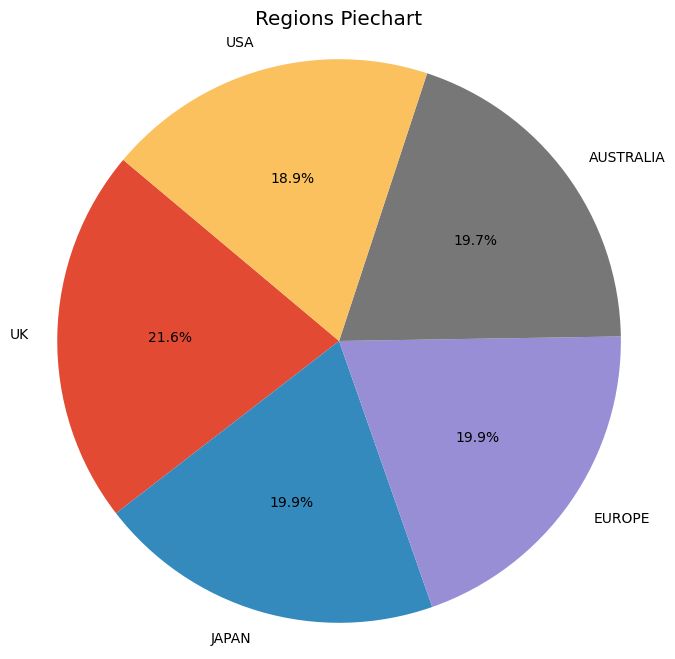

In [37]:
def pie_chart(geographics):
  counts = df[geographics].value_counts()

  plt.figure(figsize=(8,8))
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  plt.title(f'Regions Piechart')
  plt.axis('equal')
  plt.show()

pie_chart('geographics')

### Pairwise Relationships 

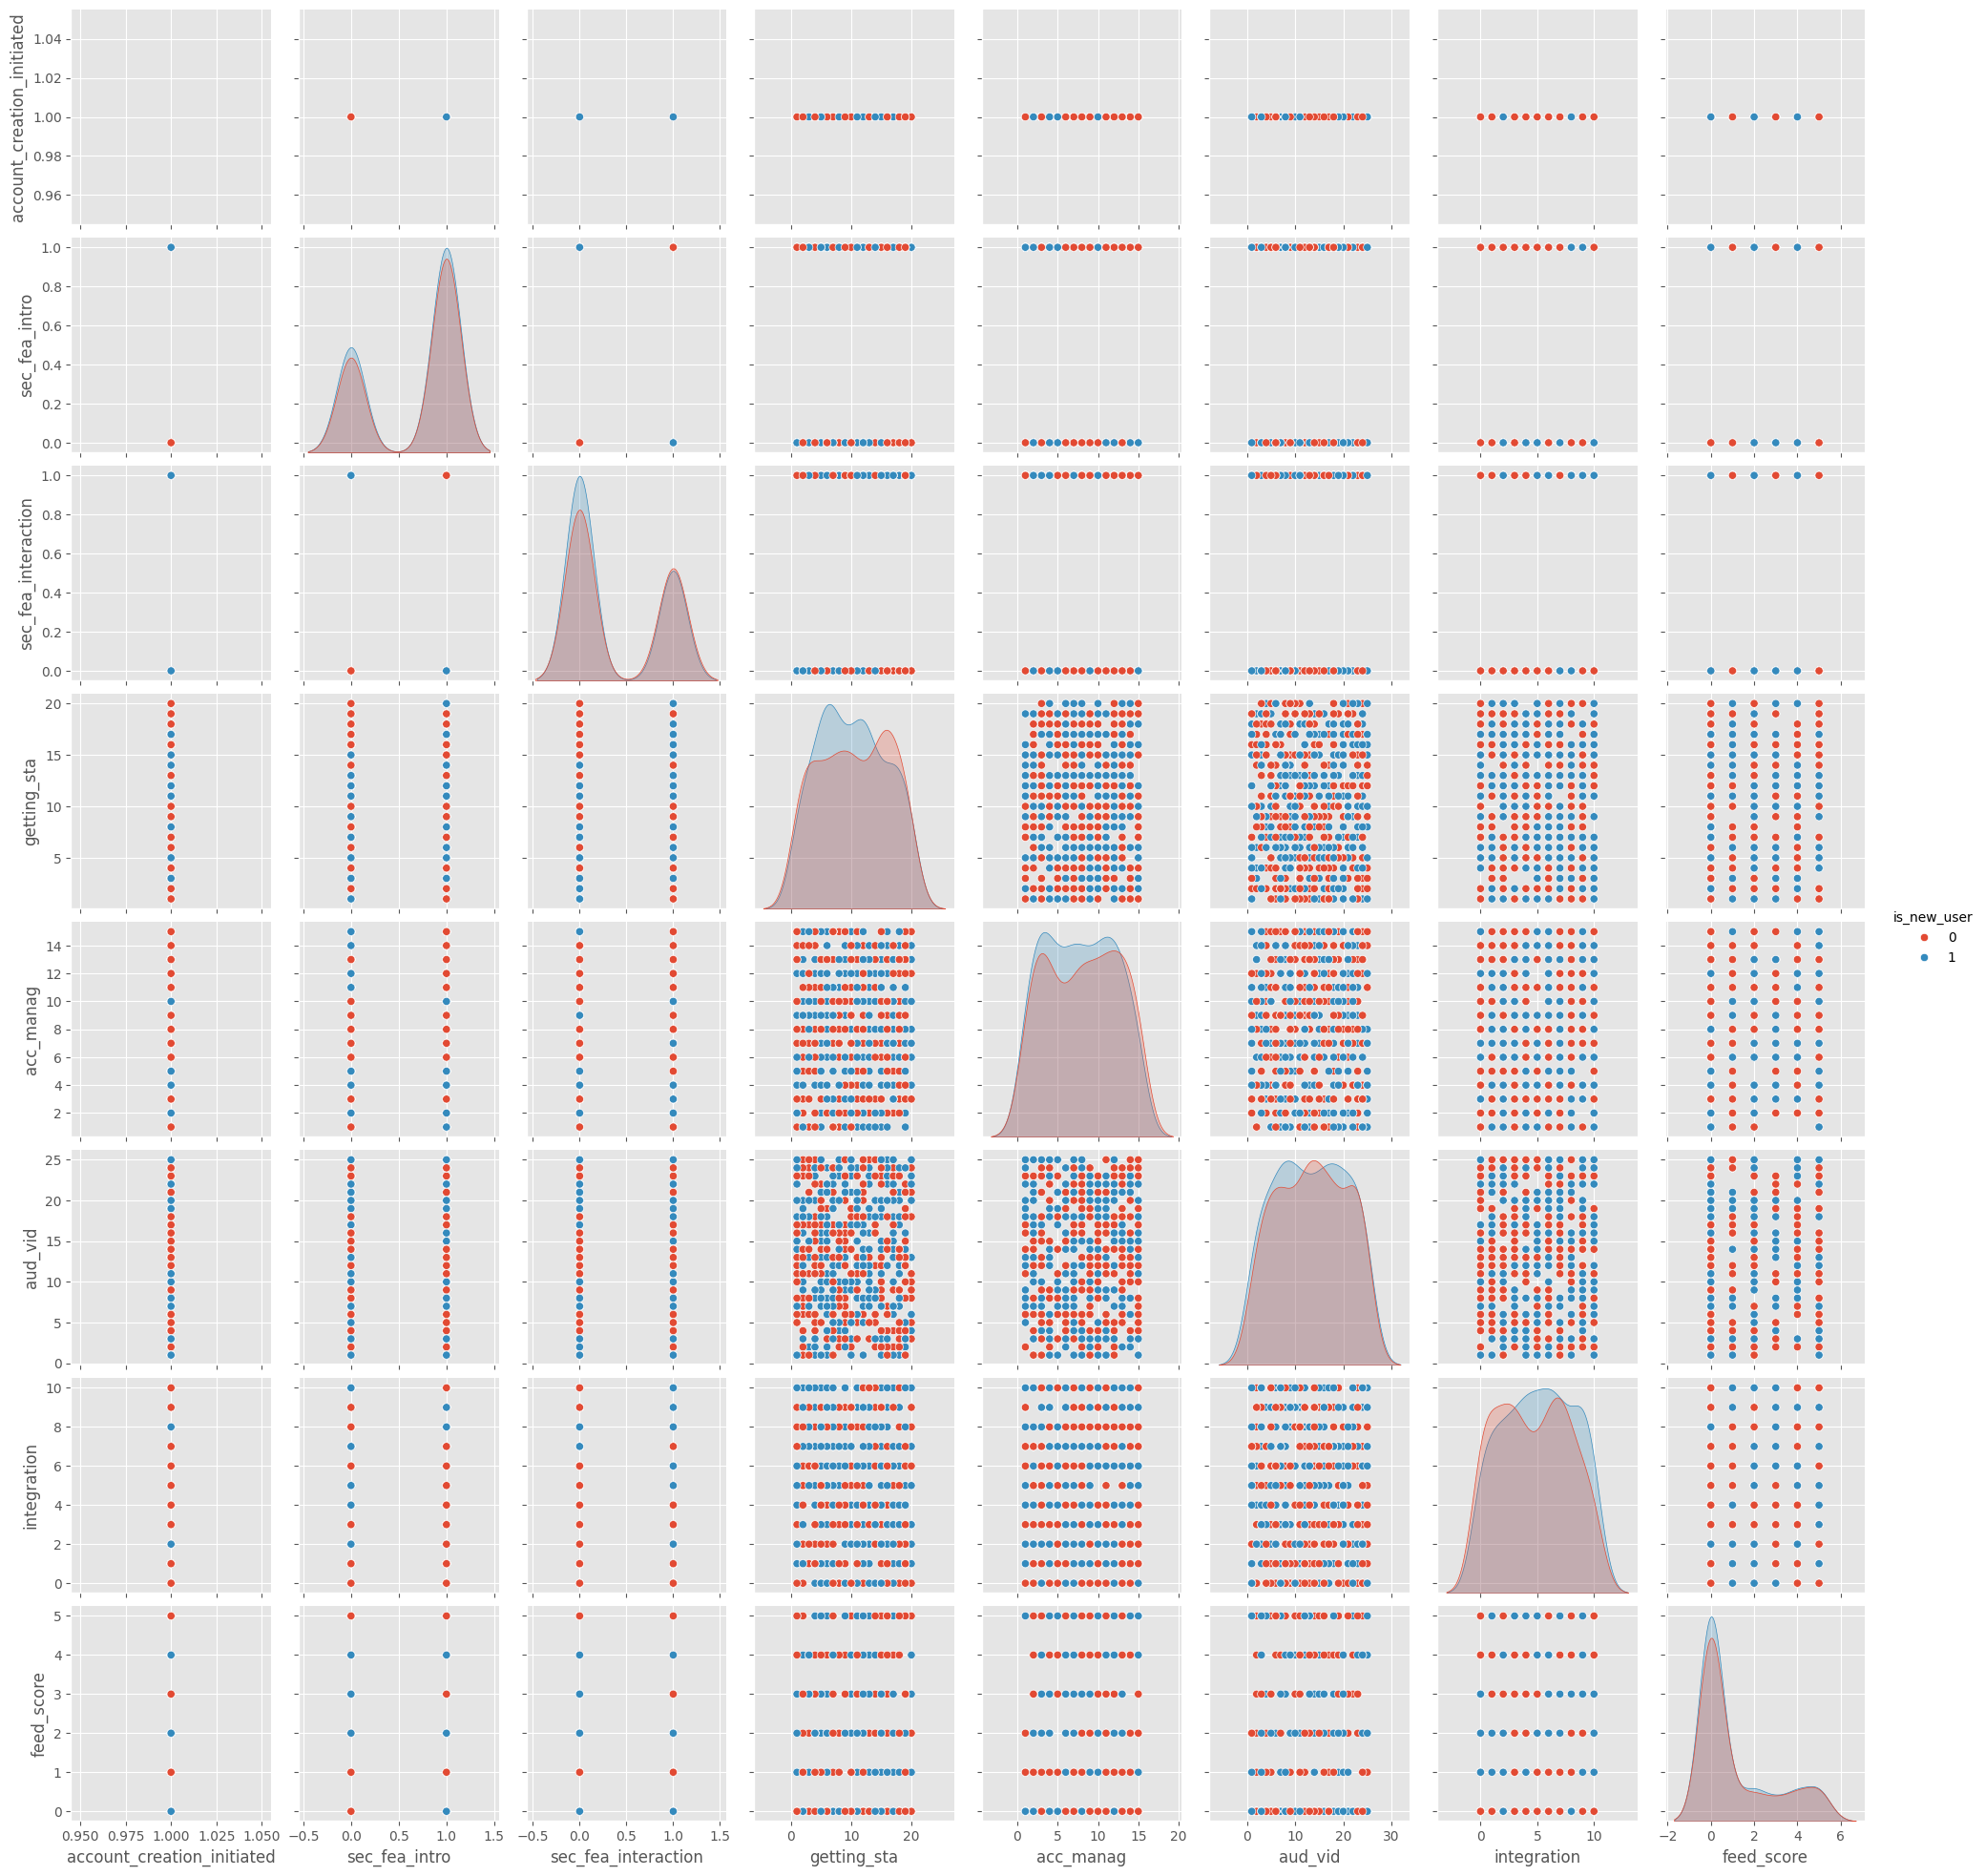

In [38]:
for col in ['sub_type', 'sign_source', 'is_new_user', 'geographics', 'first_act_tak']:
    user_df.loc[:, col] = user_df[col].astype('category')

cat_columns = user_df.select_dtypes(['category']).columns

# Finally, we transform the original columns by replacing the elements with their category codes:
user_df[cat_columns] = user_df[cat_columns].apply(lambda x: x.cat.codes)

sns.pairplot(user_df, hue  = 'is_new_user')
plt.show()

## _Answering the questions_:



#### Drop-off stages: Analyze at which stages users are dropping off by calculating the completion rates ####

In [39]:

# Account verification Compelation rate # STAGE 1 #

# Filter rows with valid values in "email verification com" (exclude NaT)
filtered_email = user_df[~user_df['email_verification_com'].isna()]

# Count the number of rows in the filtered DataFrame
email_verified_count = filtered_email.shape[0]

# Total accounts created 
total_accounts_created = user_df.shape[0]

# Calculate the verification rate
account_verification_rate = (email_verified_count / total_accounts_created) * 100
print(f"Verification Compelation rate : {account_verification_rate:.2f}%")

# Profile Setup Compelation rate   # STAGE 2 #

filtered_pro_com = user_df[~user_df['profile_setup_com'].isna()]
profil_set_com_count = filtered_pro_com.shape[0]
total_accounts_created = user_df.shape[0]
profile_setup_rate = (profil_set_com_count / total_accounts_created) * 100
print(f"Profile Setup Compelation : {profile_setup_rate:.2f}%")

# Feature Tutorial Completed   # STAGE 3 #
filtered_feat_tut_com = user_df[~user_df['feature_tuto_com'].isna()]
feat_tut_com_count = filtered_feat_tut_com.shape[0]
total_accounts_created = user_df.shape[0]
feat_tuto_rate = (feat_tut_com_count / total_accounts_created) * 100
print(f"Feature Tutorial Completed : {feat_tuto_rate:.2f}%")

# First Action Taken    #  STAGE 4 #
filtered_action = user_df[~user_df['first_act_tak'].isna()]
first_action_taken_count = filtered_action.shape[0]
total_accounts_created = user_df.shape[0]
first_action_taken_rate = (first_action_taken_count / total_accounts_created) * 100
print(f"First Action Taken: {first_action_taken_rate:.2f}%")

# Secondary Feature Interaction  #  STAGE 5 #

successful_completions = user_df[user_df['sec_fea_interaction'] == 1].shape[0]  # Alternative
total_users = user_df.shape[0]
second_feature_interaction_rate = (successful_completions / total_users) * 100
print(f"Secondary Feature Interaction: {second_feature_interaction_rate:.2f}%")


Verification Compelation rate : 76.23%
Profile Setup Compelation : 76.23%
Feature Tutorial Completed : 39.84%
First Action Taken: 30.66%
Secondary Feature Interaction: 37.21%


### Visualization of Completion Rates by Stage

[Text(0, 0, 'Account\nVerification'),
 Text(1, 0, 'Profile\nSetup'),
 Text(2, 0, 'Feature\nTutorial'),
 Text(3, 0, 'First\nAction'),
 Text(4, 0, 'Second Feature\nInteraction')]

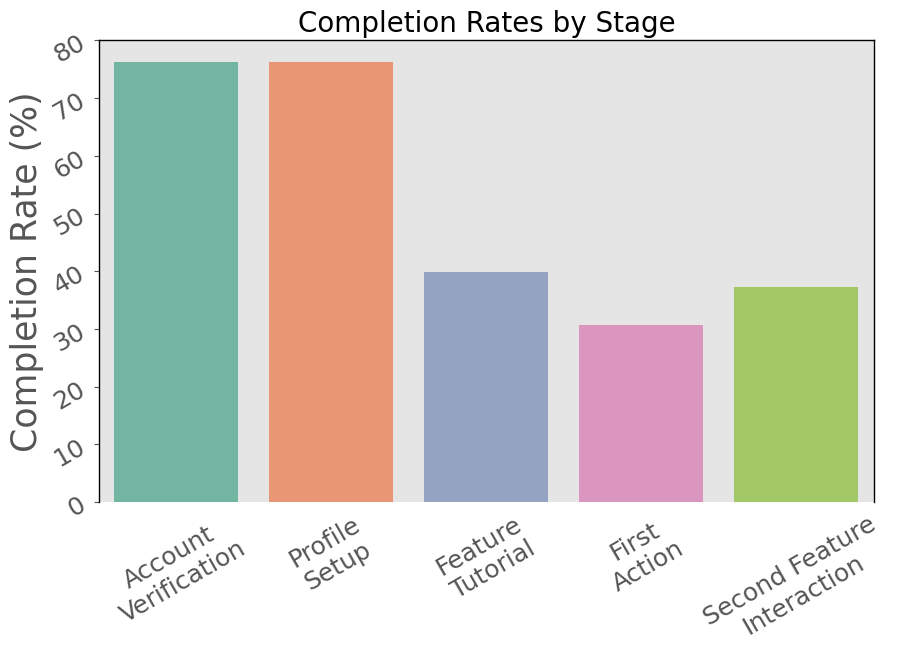

In [40]:
stage_data = {'account verification rate': [account_verification_rate],
            'Profile setup rate': [profile_setup_rate] ,
            'Feature Tutorial Rate': [feat_tuto_rate] ,
            'First Action rate': [first_action_taken_rate] ,
            'Second Feature Interaction Rate': [second_feature_interaction_rate]}

stage_completion_rate = pd.DataFrame(stage_data) 

stage_completion_rate = pd.melt(stage_completion_rate, var_name='Stage', value_name='Completion Rate (%)')


# Create the figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))
xticks_positions = [0,1, 2, 3, 4]
ax.set_xticks(xticks_positions)
# Plot the bar chart with different colors
ax = sns.barplot(x='Stage', y='Completion Rate (%)', data=stage_completion_rate, hue='Stage', legend=False, palette='Set2')
ax.set_title('Completion Rates by Stage', fontsize=20)
ax.set_xlabel(None)
ax.tick_params(bottom=False, left=True, labelsize=18, rotation=30)
ax.set_ylabel('Completion Rate (%)', fontsize=25)

# Hide the bottom spine
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Set black color for spines
for _, s in ax.spines.items():
    s.set_color('black')

# Adjust the x-axis tick labels
ax.set_xticklabels(['Account\nVerification', 'Profile\nSetup', 'Feature\nTutorial', 'First\nAction', 'Second Feature\nInteraction'])

#### Drop-off steps: Analyze at which steps users are dropping off by calculating the completion rates ####


In [41]:

  ### Let's see the compelation rate between steps.

## Email verificaion rate   
total_email_started = user_df[~user_df['email_verification_sta'].isna()]
total_email_started_count = total_email_started.shape[0]

# Calculate the verification rate
email_verification_rate = (email_verified_count / total_email_started_count) * 100

## Profile Setup rate
total_profi_started = user_df[~user_df['profile_setup_sta'].isna()]
total_profile_started_count = total_profi_started.shape[0]
profile_setupp_rate = (profil_set_com_count / total_profile_started_count) * 100

## Feature Tutorial rate
total_feat_started = user_df[~user_df['feature_tuto_sta'].isna()]
total_feat_started_count = total_feat_started.shape[0]
feat_tutoo_rate = (feat_tut_com_count / total_feat_started_count) * 100

## First actio taken/feature tutorial completed
first_feat_intro_count = user_df[~user_df['first_feat_intro'].isna()]
first_feat_intro_count_total= first_feat_intro_count.shape[0]
first_act_take_rate = (first_action_taken_count / first_feat_intro_count_total) * 100

## Secondady feature interaction/ introduction     
successful_completions = user_df[user_df['sec_fea_interaction'] == 1].shape[0] 
sec_feaa_count_total = user_df[user_df['sec_fea_intro'] == 1].shape[0]
second_feature_interact_rate = (successful_completions / sec_feaa_count_total) * 100

### Visualization of Completion Rates by Step


[Text(0, 0, 'Email\nVerification\nComp'),
 Text(1, 0, 'Profile\nSetup\nComp'),
 Text(2, 0, 'Feature\nTutorial\nComp'),
 Text(3, 0, 'First\nAction\nComp'),
 Text(4, 0, 'Second Feature\nInteraction\nComp')]

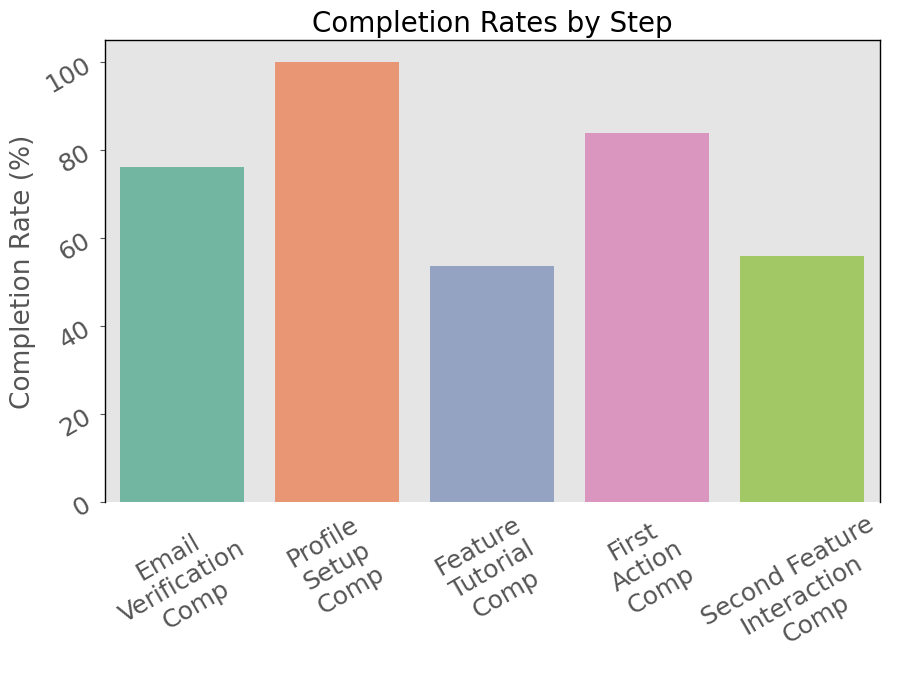

In [42]:
step_data = {'Email verification Comp': [email_verification_rate],
            'Profile setup Comp': [profile_setupp_rate] ,
            'Feature Tutorial Comp': [feat_tutoo_rate] ,
            'First Action Comp': [first_act_take_rate] ,
            'Second Feature Interaction Comp': [second_feature_interact_rate]}


step_completion_rate = pd.DataFrame(step_data) 

step_completion_rate = pd.melt(step_completion_rate, var_name='Step', value_name='Completion Rate (%)')


# Create the figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

xticks_positions = [0,1, 2, 3, 4]
ax.set_xticks(xticks_positions)

# Plot the bar chart with different colors
ax = sns.barplot(x='Step', y='Completion Rate (%)', data=step_completion_rate, hue='Step', legend=False, palette='Set2')
ax.set_title('Completion Rates by Step', fontsize=20)
ax.set_xlabel(None)
ax.tick_params(bottom=False, left=True, labelsize=18, rotation=30)
ax.set_ylabel('Completion Rate (%)', fontsize=19)

# Hide the bottom spine
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Set black color for spines
for _, s in ax.spines.items():
    s.set_color('black')

# Adjust the x-axis tick labels
ax.set_xticklabels(['Email\nVerification\nComp', 'Profile\nSetup\nComp', 'Feature\nTutorial\nComp', 'First\nAction\nComp', 'Second Feature\nInteraction\nComp'])


### Grouping the data by various attributes (geographics, signup source, subscription type) and analyzing the completion rates for each group 


In [43]:
## Account Verification rate

# Define a function to calculate and return the completion rate Series
def calculate_completion_rate(group):
  # Filter for users who started profile setup (not null) # we assume they are the once who completed the email verification
  email_verifiedd = group[~group['email_verification_com'].isna()]
  
  # Count users who completed profile setup (not NaT)
  email_verifiedd_count = email_verifiedd[~email_verifiedd['email_verification_com'].isna()].shape[0]

  # Count total users who started profile setup
  total_users = user_df.shape[0]
  
  # Calculate and return completion rate
  if total_users > 0:  # Avoid division by zero
    completion_rate = (email_verifiedd_count / total_users) * 100
  else:
    completion_rate = 0  # Set completion rate to 0 if no users started
  return completion_rate

  # Return the Series containing completion rates for the group
  return group['completion_rate']

# Group the DataFrame by 'geographics'
grouped_geo = user_df.groupby(['geographics'])

#Apply the function and store the result in a new DataFrame
account_rates_geo = grouped_geo.apply(calculate_completion_rate, include_groups=False) 
print(account_rates_geo)

# Group the DataFrame by 'Signup source'
grouped_sign = user_df.groupby(['sign_source'])

# Apply the function and store the result in a new DataFrame
account_rates_sign= grouped_sign.apply(calculate_completion_rate, include_groups=False)
print(account_rates_sign)

# Group the DataFrame by 'subscription type'
grouped_sub = user_df.groupby(['sub_type'])

# Apply the function and store the result in a new DataFrame
account_rates_sub= grouped_sub.apply(calculate_completion_rate, include_groups=False)
print(account_rates_sub)

#### profile setup rates


# Define a function to calculate and return the completion rate Series
def calculate_prof_rate(group):
  # Filter for users who started profile setup (not null)
  prof_set_compl = group[~group['profile_setup_com'].isna()]
  
  # Count users who completed profile setup (not NaT)
  prof_set_comp_count = prof_set_compl[~prof_set_compl['profile_setup_com'].isna()].shape[0]

  # Count total users who started profile setup
  total_users = user_df.shape[0]

  
  # Calculate and return completion rate
  if total_users > 0:  # Avoid division by zero
    prof_rate = (prof_set_comp_count / total_users) * 100
  else:
    prof_rate = 0  # Set completion rate to 0 if no users started
  return prof_rate

  # Return the Series containing completion rates for the group
  return group['prof_rate']

# Group DataFrame by 'geographics'
grouped_pro_geo = user_df.groupby(['geographics'])

# Apply the function and store the result in a new DataFrame
prof_set_rates_geo = grouped_pro_geo.apply(calculate_prof_rate, include_groups=False) 
print(prof_set_rates_geo)

# Group DataFrame by 'signup source'
grouped_pro_sign = user_df.groupby(['sign_source'])

# Apply the function and store the result in a new DataFrame
prof_set_rates_sign = grouped_pro_sign.apply(calculate_prof_rate, include_groups=False) 
print(prof_set_rates_sign)

# Group DataFrame by 'subscription type'
grouped_pro_sub = user_df.groupby(['sub_type'])

# Apply the function and store the result in a new DataFrame
prof_set_rates_sub = grouped_pro_sub.apply(calculate_prof_rate, include_groups=False) 
print(prof_set_rates_sub)


#### Feature Tuto rates


# Define a function to calculate and return the completion rate Series
def calculate_feat_rate(group):
  # Filter for users who started profile setup (not null)
  feat_tut_compl = group[~group['feature_tuto_com'].isna()]
  
  # Count users who completed profile setup (not NaT)
  feat_tut_compl_count = feat_tut_compl[~feat_tut_compl['feature_tuto_com'].isna()].shape[0]

  # Count total users who started profile setup
  total_users = user_df.shape[0]

  
  # Calculate and return completion rate
  if total_users > 0:  # Avoid division by zero
    feat_rate = (feat_tut_compl_count / total_users) * 100
  else:
    feat_rate = 0  # Set completion rate to 0 if no users started
  return feat_rate

  # Return the Series containing completion rates for the group
  return group['feat_rate']

# Group DataFrame by ' geographics'
grouped_fea_geo = user_df.groupby(['geographics'])
# Apply the function and store the result in a new DataFrame
feat_rates_geo = grouped_fea_geo.apply(calculate_feat_rate, include_groups=False)
print(feat_rates_geo) 

# Group DataFrame by 'signup source'
grouped_fea_sign= user_df.groupby(['sign_source'])
# Apply the function and store the result in a new DataFrame
feat_rates_sign = grouped_fea_sign.apply(calculate_feat_rate, include_groups=False) 
print(feat_rates_sign)

# Group DataFrame by ' susbscription type'
grouped_fea_sub = user_df.groupby(['sub_type'])
# Apply the function and store the result in a new DataFrame
feat_rates_sub = grouped_fea_sub.apply(calculate_feat_rate, include_groups=False) 
print(feat_rates_sub)


#### First Action Taken rates

# Define a function to calculate and return the completion rate Series
def calculate_fa_rate(group):
  # Filter for users who started profile setup (not null)
  fa = group[~group['first_act_tak'].isna()]
  
  # Count users who completed profile setup (not NaT)
  fa_count = fa[~fa['first_act_tak'].isna()].shape[0]

  # Count total users who started profile setup
  total_users = user_df.shape[0]

  
  # Calculate and return completion rate
  if total_users > 0:  # Avoid division by zero
    fa_rate = (fa_count / total_users) * 100
  else:
    fa_rate = 0  # Set completion rate to 0 if no users started
  return fa_rate

  # Return the Series containing completion rates for the group
  return group['fa_rate']

# Groupe DF by "Geographics"
grouped_first_act_geo = user_df.groupby(['geographics'])
# Apply the function and store the result in a new DataFrame
first_action_rates_geo = grouped_first_act_geo.apply(calculate_fa_rate, include_groups=False) 
print(first_action_rates_geo)

# Groupe DF by "signup source"
grouped_first_act_sign = user_df.groupby(['sign_source'])
# Apply the function and store the result in a new DataFrame
first_action_rates_sign = grouped_first_act_sign.apply(calculate_fa_rate, include_groups=False) 
print(first_action_rates_sign)

# Groupe DF by "subscription type"
grouped_first_act_sub = user_df.groupby(['sub_type'])
# Apply the function and store the result in a new DataFrame
first_action_rates_sub = grouped_first_act_sub.apply(calculate_fa_rate, include_groups=False) 
print(first_action_rates_sub)

#### Secondary Feature Interaction rates


# Define a function to calculate and return the completion rate Series
def calculate_sec_fea_rate(group):
  # Filter for users who started profile setup (not null)
  sec_fea_count= group[group['sec_fea_interaction'] == 1].shape[0]
  
  # Count total users who started profile setup
  total_users = user_df.shape[0]


  # Calculate and return completion rate
  if total_users > 0:  # Avoid division by zero
    sec_fea_rate = (sec_fea_count / total_users) * 100
  else:
    sec_fea_rate = 0  # Set completion rate to 0 if no users started
  return sec_fea_rate

  # Return the Series containing completion rates for the group
  return group['sec_fea_rate']

# Group DF by 'geographics'
grouped_sec_fea_geo = user_df.groupby(['geographics'])
# Apply the function and store the result in a new DataFrame
sec_fea_rates_geo = grouped_sec_fea_geo.apply(calculate_sec_fea_rate, include_groups=False) 
print(sec_fea_rates_geo)

# Group DF by 'signup source'
grouped_sec_fea_sign = user_df.groupby(['sign_source'])
# Apply the function and store the result in a new DataFrame
sec_fea_rates_sign = grouped_sec_fea_sign.apply(calculate_sec_fea_rate, include_groups=False) 
print(sec_fea_rates_sign)

# Group DF by 'subscription type'
grouped_sec_fea_sub = user_df.groupby(['sub_type'])
# Apply the function and store the result in a new DataFrame
sec_fea_rates_sub = grouped_sec_fea_sub.apply(calculate_sec_fea_rate, include_groups=False) 
print(sec_fea_rates_sub)


geographics
AUSTRALIA    16.065574
EUROPE       14.262295
JAPAN        15.409836
UK           16.229508
USA          14.262295
dtype: float64
sign_source
Advertisement    19.016393
Referral         18.032787
Social Media     20.000000
Website          19.180328
dtype: float64
sub_type
Basic         21.475410
Business      19.016393
Enterprise    18.032787
Pro           17.704918
dtype: float64
geographics
AUSTRALIA    16.065574
EUROPE       14.262295
JAPAN        15.409836
UK           16.229508
USA          14.262295
dtype: float64
sign_source
Advertisement    19.016393
Referral         18.032787
Social Media     20.000000
Website          19.180328
dtype: float64
sub_type
Basic         21.475410
Business      19.016393
Enterprise    18.032787
Pro           17.704918
dtype: float64
geographics
AUSTRALIA    7.377049
EUROPE       9.508197
JAPAN        8.360656
UK           8.524590
USA          6.065574
dtype: float64
sign_source
Advertisement     9.344262
Referral          9.508197
Soc

### Visualization of Stage completion rates Grouped by {Georgraphics, Signup Source, Subscription Type}


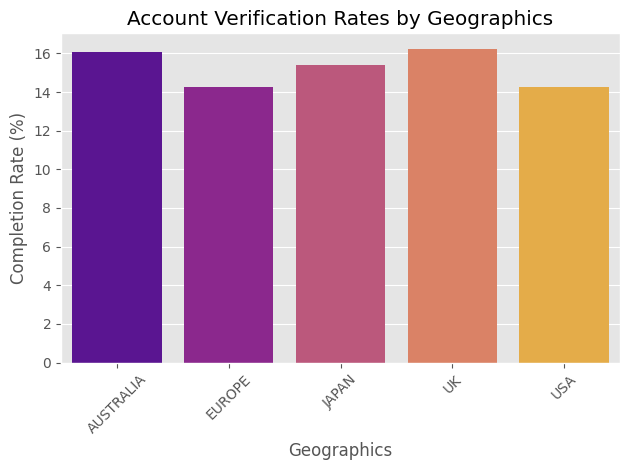

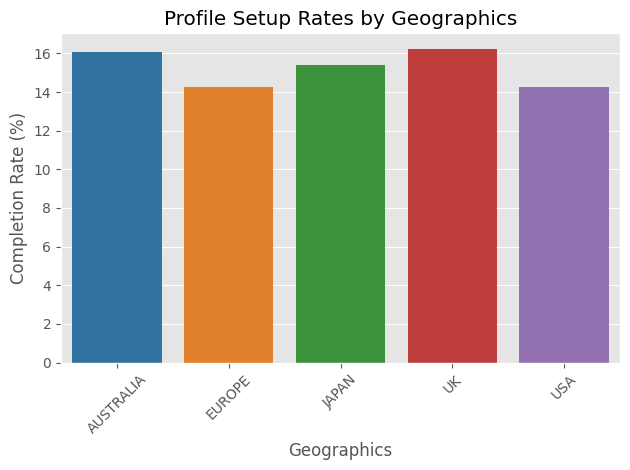

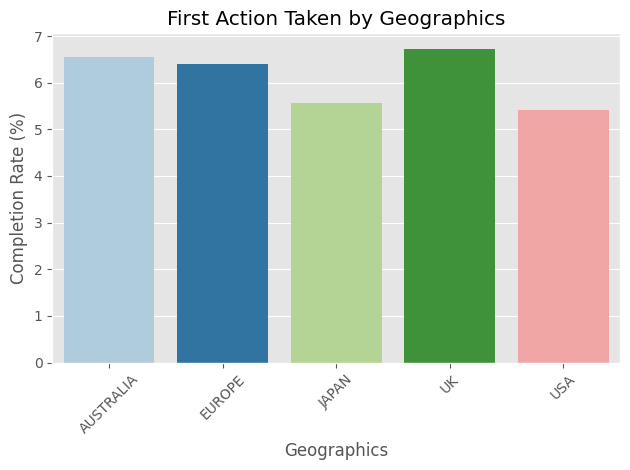

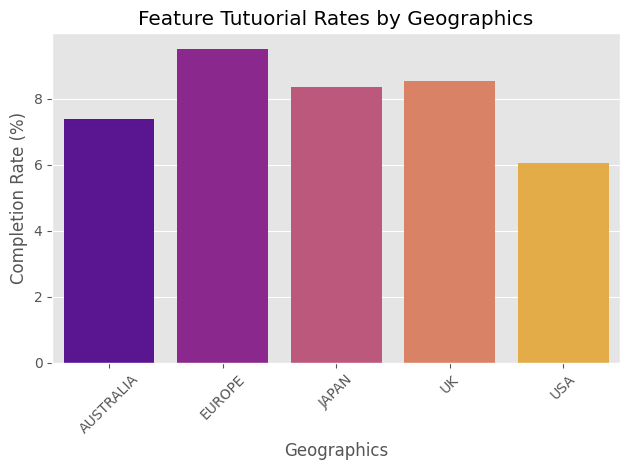

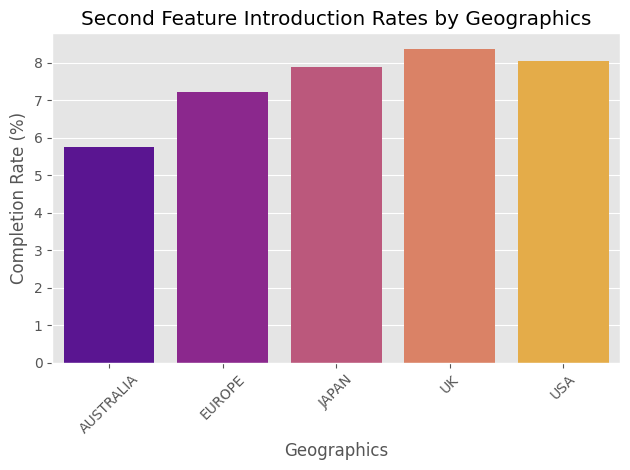

In [44]:
rates_dff = pd.DataFrame({
    'Account Verification Rate': [account_rates_geo],
    'Profile Setup Rate': [prof_set_rates_geo],
    'First Action Rate': [first_action_rates_geo],
    'Feature Tutorial Rate': [feat_rates_geo],
    'Second Feature Rate': [sec_fea_rates_geo]
    
})

## Account Verification
sns.barplot(x=account_rates_geo.index, y=account_rates_geo.values, hue= account_rates_geo.index, legend= False, palette="plasma")  # Access index for x-axis labels
plt.title('Account Verification Rates by Geographics')
plt.xlabel('Geographics')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Profile Setup Verification
sns.barplot(x=prof_set_rates_geo.index, y=prof_set_rates_geo.values, hue= prof_set_rates_geo.index, legend=False, palette="tab10")  # Access index for x-axis labels
plt.title('Profile Setup Rates by Geographics')
plt.xlabel('Geographics')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## First Action Taken 
sns.barplot(x=first_action_rates_geo.index, y=first_action_rates_geo.values, hue=first_action_rates_geo.index, legend=False, palette="Paired")  # Access index for x-axis labels
plt.title('First Action Taken by Geographics')
plt.xlabel('Geographics')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Feature Turorial 
sns.barplot(x=feat_rates_geo.index, y=feat_rates_geo.values, hue=feat_rates_geo.index, legend=False, palette="plasma")  # Access index for x-axis labels
plt.title('Feature Tutuorial Rates by Geographics')
plt.xlabel('Geographics')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Second Feature
sns.barplot(x=sec_fea_rates_geo.index, y=sec_fea_rates_geo.values, hue=sec_fea_rates_geo.index, legend=False,  palette="plasma")  # Access index for x-axis labels
plt.title('Second Feature Introduction Rates by Geographics')
plt.xlabel('Geographics')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Visualize all Stages rates Grouped by Geographics, Signup source, Subscription Type 


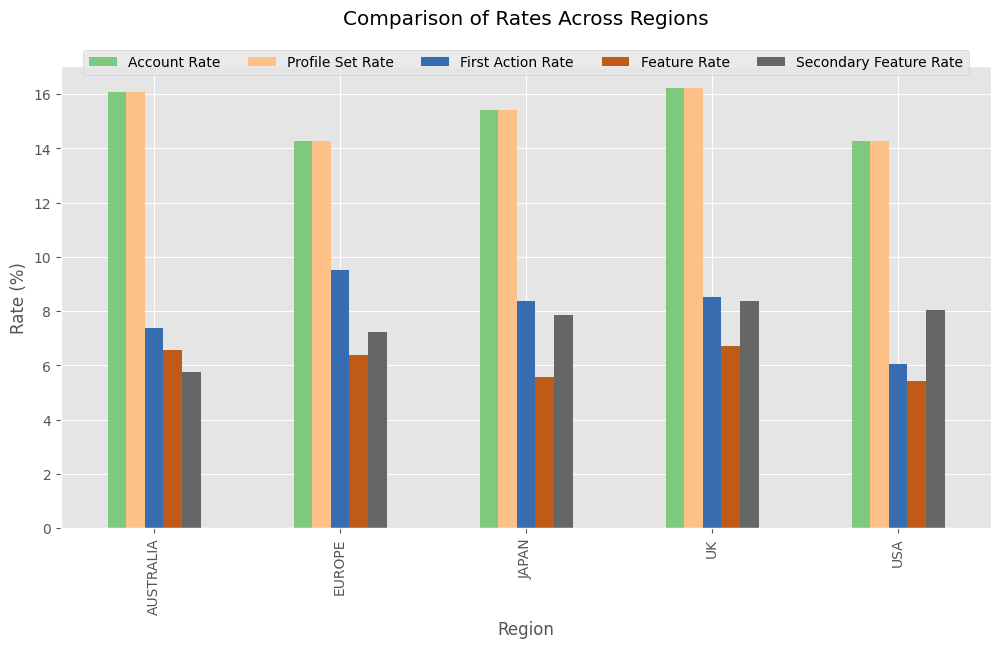

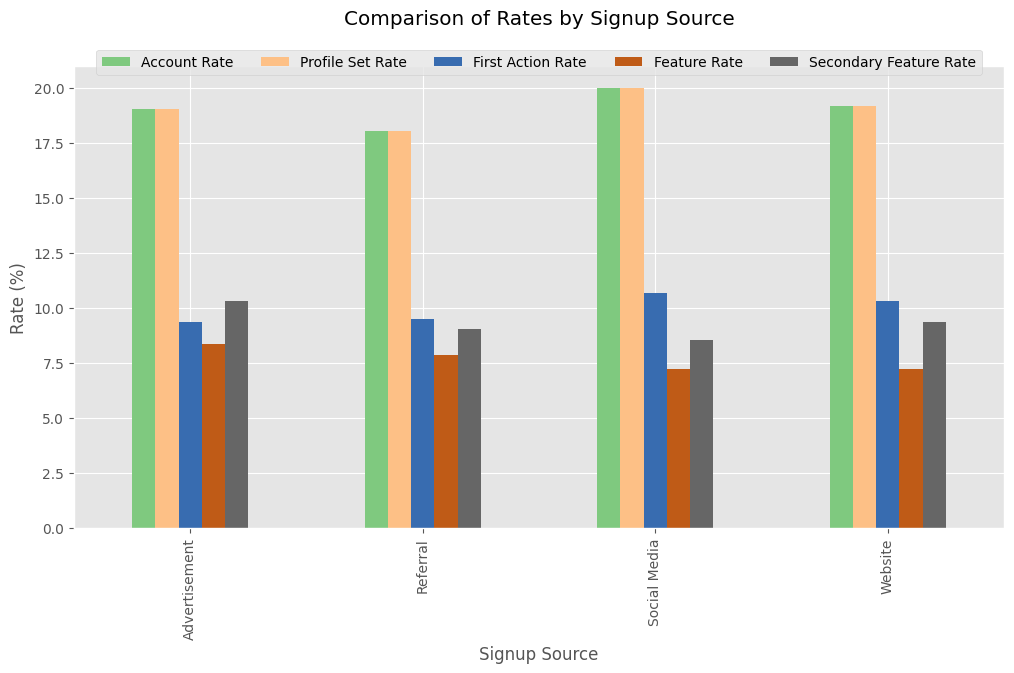

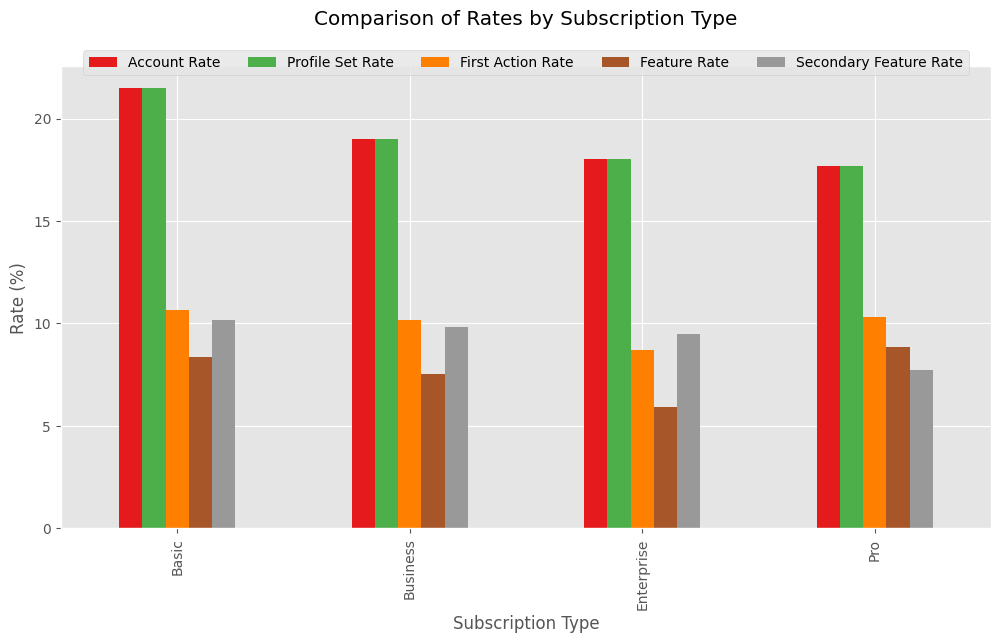

In [45]:

all_rates_geo = pd.concat([account_rates_geo, prof_set_rates_geo, feat_rates_geo,
                          first_action_rates_geo, sec_fea_rates_geo], axis=1)

all_rates_sign = pd.concat([account_rates_sign, prof_set_rates_sign, feat_rates_sign,
                           first_action_rates_sign, sec_fea_rates_sign], axis=1)

all_rates_sub = pd.concat([account_rates_sub, prof_set_rates_sub, feat_rates_sub,
                          first_action_rates_sub, sec_fea_rates_sub], axis=1)

# Rename the columns for clarity 

new_geo = ['Account Rate', 'Profile Set Rate', 
                         'First Action Rate', 'Feature Rate', 'Secondary Feature Rate']

new_sign = ['Account Rate', 'Profile Set Rate', 
                         'First Action Rate', 'Feature Rate', 'Secondary Feature Rate']

new_sub = ['Account Rate', 'Profile Set Rate', 
                         'First Action Rate', 'Feature Rate', 'Secondary Feature Rate']

all_rates_geo.columns = new_geo
all_rates_sign.columns = new_sign
all_rates_sub.columns = new_sub


# Visualize Comparison of rates across regions

fig, ax = plt.subplots(figsize=(12,6))
all_rates_geo.plot(kind='bar', ax=ax, colormap='Accent')

# Adjust the title and legend position
plt.title('Comparison of Rates Across Regions', pad=30)
plt.xlabel('Region')
plt.ylabel('Rate (%)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5)

plt.show()

#Visualize Comparison of rates by Signup source
fig, ax = plt.subplots(figsize=(12,6))
all_rates_sign.plot(kind='bar', ax=ax, colormap='Accent')

# Adjust the title and legend position
plt.title('Comparison of Rates by Signup Source', pad=30)
plt.xlabel('Signup Source')
plt.ylabel('Rate (%)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5)

plt.show()

#Visualize Comparison of rates by Subscription type
fig, ax = plt.subplots(figsize=(12,6))
all_rates_sub.plot(kind='bar', ax=ax, colormap='Set1')

# Adjust the title and legend position
plt.title('Comparison of Rates by Subscription Type', pad=30)
plt.xlabel('Subscription Type')
plt.ylabel('Rate (%)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5)

plt.show()

## Calculate the durations

In [64]:

filtred_dataframe = df.dropna(subset= ['profile_setup_sta', 'profile_setup_com',
                                      'email_verification_com', 'email_verification_sta',
                                      'feature_tuto_sta', 'first_act_tak',
                                      'feature_tuto_com', 'first_feat_intro'])

#Tutorial Duration
tutorial_duration = ((filtred_dataframe['feature_tuto_com'] - filtred_dataframe['feature_tuto_sta']).dt.total_seconds() / 60)
print(tutorial_duration)
                                                    
user_df.loc[:,'tutorial_duration'] = tutorial_duration # we add it to our dataframe for future usage

# Email Verification Duration in minutes
email_verifi_duration = ((filtred_dataframe['email_verification_com'] - filtred_dataframe['email_verification_sta']).dt.total_seconds() / 60)
print(email_verifi_duration)

# Profile Setup Duration in minutes
profile_setup_duration = (filtred_dataframe['profile_setup_com'] - filtred_dataframe['profile_setup_sta']).dt.total_seconds() / 60
print(profile_setup_duration)

# Feature Tutorial Duration in minutes
feature_tuto_duration = (filtred_dataframe['feature_tuto_com'] - filtred_dataframe['feature_tuto_sta']).dt.total_seconds() / 60
print(feature_tuto_duration)

# First Action Duration in minutes
first_action_duration = (filtred_dataframe['first_act_tak'] - filtred_dataframe['first_feat_intro']).dt.total_seconds() / 60

1      29.690767
3      26.329267
5      29.035933
7      28.049917
9      28.127233
         ...    
347    28.426733
349    27.070333
351    25.904917
353    26.185700
355    25.008783
Length: 178, dtype: float64
1      5.265033
3      7.768067
5      5.932017
7      8.574967
9      9.807433
         ...   
347    8.771350
349    9.444300
351    8.124800
353    6.267133
355    9.673983
Length: 178, dtype: float64
1      17.307500
3      15.353750
5      15.948600
7      18.625317
9      19.630933
         ...    
347    17.210967
349    16.168450
351    16.419383
353    17.131967
355    19.638033
Length: 178, dtype: float64
1      29.690767
3      26.329267
5      29.035933
7      28.049917
9      28.127233
         ...    
347    28.426733
349    27.070333
351    25.904917
353    26.185700
355    25.008783
Length: 178, dtype: float64


In [48]:
duration_df = pd.DataFrame({'Tutorial Duration': tutorial_duration, 
                            'Profile Setup Duration': profile_setup_duration,
                            'Email Verification Duration': email_verifi_duration,
                            'Feature Tutorial Duration': feature_tuto_duration,
                            'First Action Duration': first_action_duration})
print(duration_df.head(5))

   Tutorial Duration  Profile Setup Duration  Email Verification Duration  \
1          29.690767               17.307500                     5.265033   
3          26.329267               15.353750                     7.768067   
5          29.035933               15.948600                     5.932017   
7          28.049917               18.625317                     8.574967   
9          28.127233               19.630933                     9.807433   

   Feature Tutorial Duration  First Action Duration  
1                  29.690767               1.996100  
3                  26.329267               1.499583  
5                  29.035933               2.701317  
7                  28.049917               1.982800  
9                  28.127233               2.016750  


# Visualization of duration

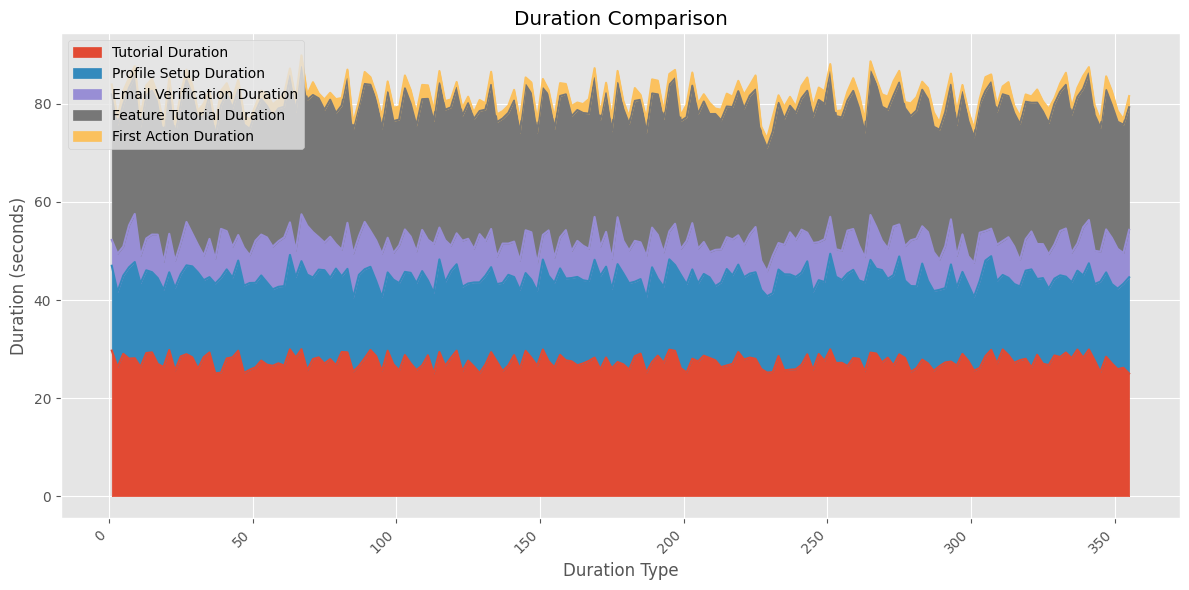

In [49]:
# Create the stacked area chart
fig, ax = plt.subplots(figsize=(12, 6))
duration_df.plot(kind='area', stacked=True, ax=ax)

plt.title('Duration Comparison')

plt.xlabel('Duration Type')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Visualization of Email Verification by Month 


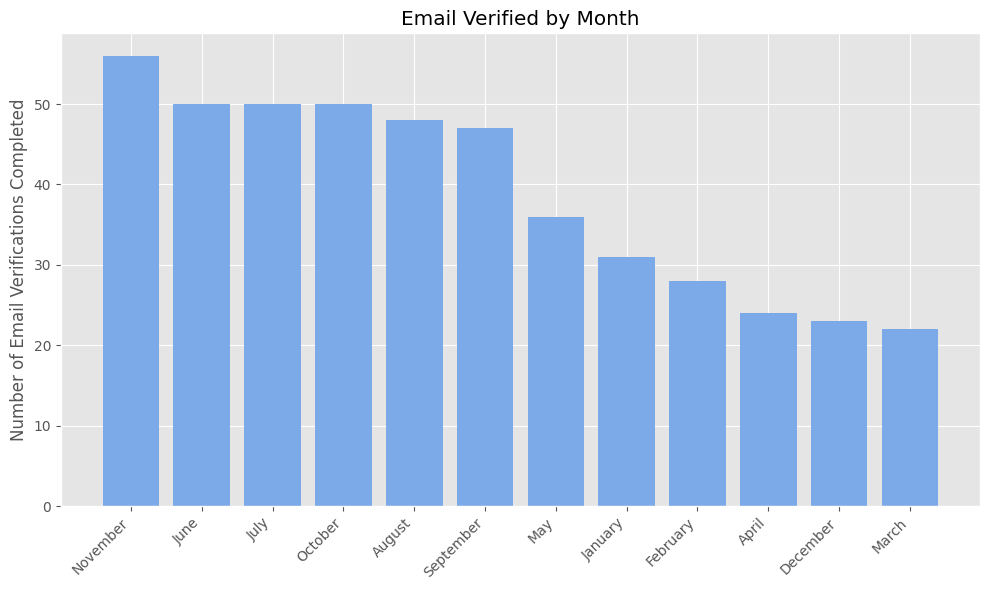

In [50]:
df_datetime = pd.DataFrame(user_df)

# Extract month from the datetime column
df_datetime['month_name'] = df_datetime['email_verification_com'].dt.month_name()

# Count verifications by month
verification_counts = df_datetime['month_name'].value_counts()

# Create a bar chart to visualize monthly verifications
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(verification_counts.index, verification_counts.values, color='#7CAAE8')
plt.xlabel('')
plt.ylabel('Number of Email Verifications Completed')
plt.title('Email Verified by Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

## Visualization of First Action Taken by Month 

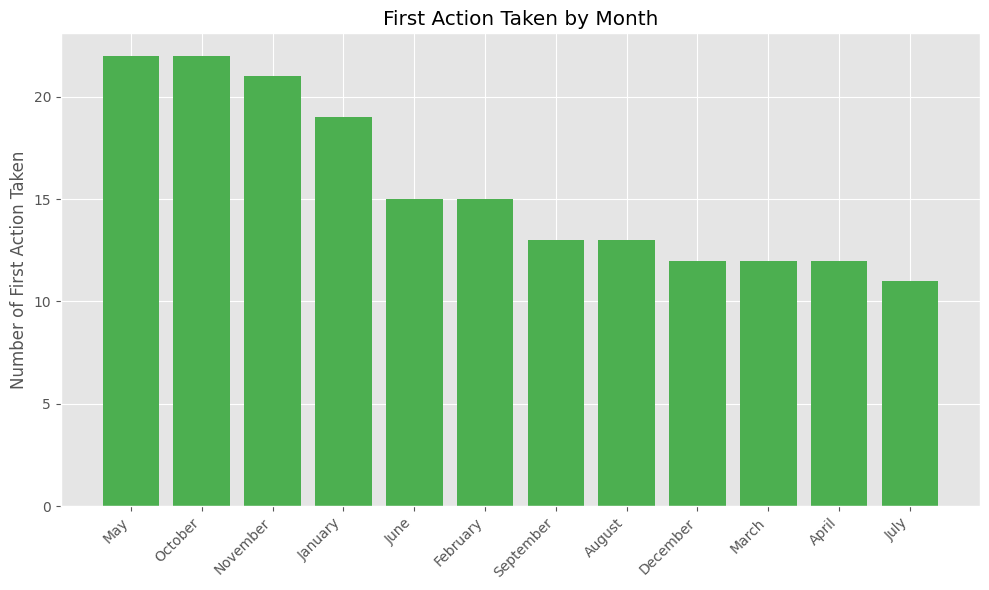

In [51]:
df_datetime = pd.DataFrame(user_df)
df_datetime['month_name2'] = df_datetime['first_act_tak'].dt.month_name()

# Count verifications by month
first_action_counts = df_datetime['month_name2'].value_counts()

# Create a bar chart to visualize monthly verifications
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(first_action_counts.index, first_action_counts.values, color='#4CAF50')
plt.xlabel('')
plt.ylabel('Number of First Action Taken')
plt.title('First Action Taken by Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

## Visualization of Support Pages views


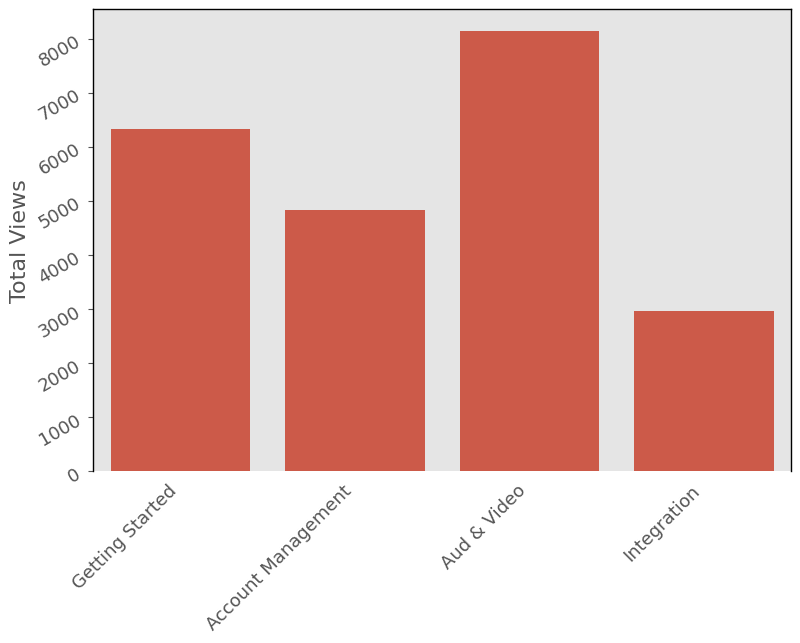

In [54]:
page_views = user_df[['getting_sta', 'acc_manag', 'aud_vid', 'integration']]
#rename the columns
page_views = page_views.rename(columns={'getting_sta': 'Getting Started',
                                       'acc_manag': 'Account Management',
                                       'aud_vid': 'Aud & Video',
                                       'integration': 'Integration'})


fig, ax = plt.subplots(figsize=(9, 6))

# Calculate the total views for each column
total_views = page_views.sum()

# Plot the bar chart with different colors
xticks_positions = [0,1, 2, 3]
ax.set_xticks(xticks_positions)
ax = sns.barplot(x=total_views.index, y=total_views)
                 
ax.set_xlabel(None)
ax.tick_params(bottom=False, left=True, labelsize=13, rotation=30)
ax.set_ylabel('Total Views', fontsize=16)
            

# Hide the bottom spine
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Set black color for spines
for _, s in ax.spines.items():
    s.set_color('black')

# Adjust the x-axis tick labels
ax.set_xticklabels(['Getting Started', 'Account Management', 'Aud & Video', 'Integration'], rotation = 45, ha = 'right')

plt.show()

## Visualization of Support pages views grouped by Subscription Type 



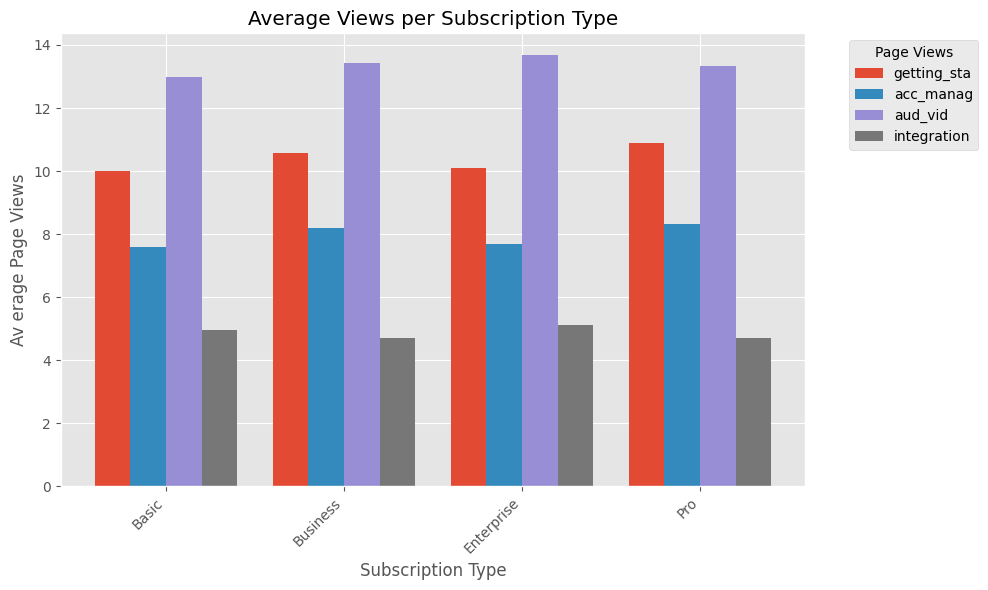

In [55]:
vis = user_df[['sub_type', 'getting_sta', 'acc_manag', 'aud_vid', 'integration']]

agg_vis = vis.groupby('sub_type').mean().reset_index()

fig, ax = plt.subplots(figsize = (10, 6))
bar_width = 0.2

positions = range(len(agg_vis))

for i, column in enumerate(['getting_sta', 'acc_manag', 'aud_vid', 'integration']):
  plt.bar([p + bar_width * i for p in positions], agg_vis[column], width= bar_width, label=column)


ax.set_xticks([p + 1.5 * bar_width for p in positions])
ax.set_xticklabels(agg_vis['sub_type'], rotation = 45, ha = 'right')

plt.xlabel('Subscription Type')
plt.ylabel('Av erage Page Views')
plt.title('Average Views per Subscription Type')
plt.legend(title= 'Page Views', bbox_to_anchor=(1.05, 1), loc= 'upper left')
plt.tight_layout()
plt.show()

#### How many users give 1 star feedback ?

In [56]:
df_check = user_df[user_df['feed_score'] == 1 ]
print()
print(f'Total number of users  who gave 1 start feedback  : {len(df_check)}.')


Total number of users  who gave 1 start feedback  : 38.


# Let's create a function that returns a Pie chart for categorical variable:

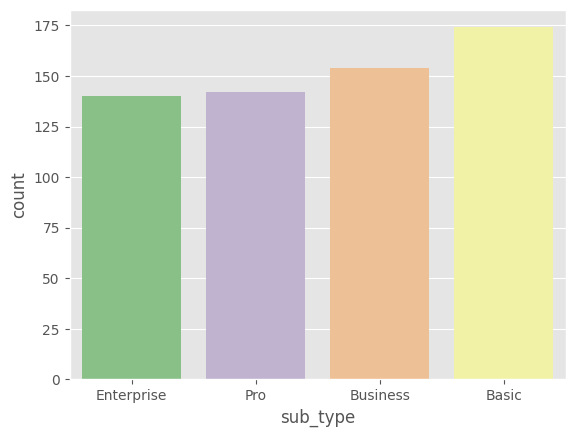

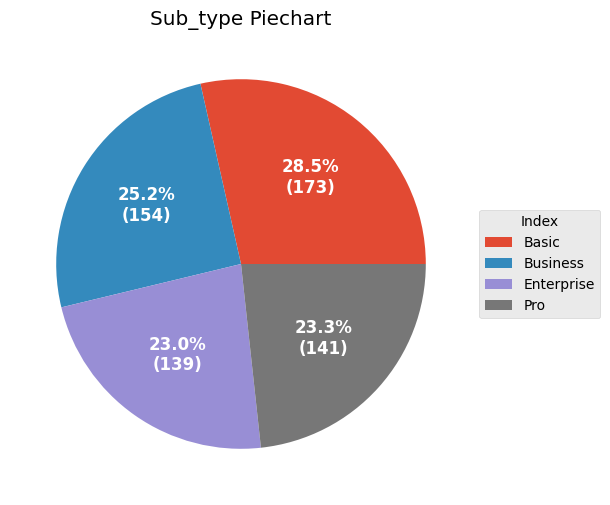

In [57]:
def pie_chart(x = 'is_new_user'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = user_df.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

    plt.show()

sns.countplot(x = 'sub_type', data = user_df, hue= 'sub_type', palette = 'Accent')

pie_chart('sub_type')

# Hypothesis Testing

## Relationship between User Type and Tutorial Duration ##

* Null Hypothesis (H0): There is no difference in the tutorial duration between returning users and new users.
* Alternative Hypothesis (H1): There is a difference in the tutorial duration between returning users and new users.


Number of returning users: 295
Variance in duartion of returning users: 1.8799166291354876
Number of new users : 315
Variance in duration of new users: 1.9571625985644525
t_statistic: nan
p_value: nan
two-sample t-test p-value= nan



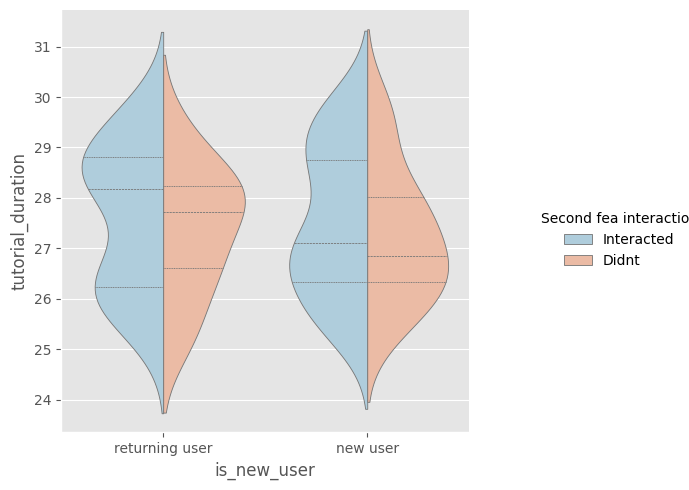

In [58]:
returning_user = user_df[user_df['is_new_user'] == 0]
new_user = user_df[user_df['is_new_user'] == 1]
duration_return = returning_user['tutorial_duration']
duration_new = new_user['tutorial_duration']

print(f'Number of returning users: {returning_user.shape[0]}')
print(f'Variance in duartion of returning users: {np.var(duration_return)}')
print(f'Number of new users : {new_user.shape[0]}')
print(f'Variance in duration of new users: {np.var(duration_new)}')

t_statistic, p_value = ttest_ind(duration_return, duration_new, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

print ("two-sample t-test p-value=", p_value)

p_value > 0.05


#Visualizing the collected data:
g = sns.catplot(x="is_new_user", y="tutorial_duration", hue="sec_fea_interaction",
            kind="violin", inner="quartiles", split=True,
            palette="RdBu_r", data=user_df, legend_out = True);

xlabels = ['returning user', 'new user']
g.set_xticklabels(xlabels)

new_title = 'Second fea interaction'
g._legend.set_title(new_title)
g._legend.set_bbox_to_anchor([1.1, 0.5])
# replace labels
new_labels = ['Interacted', 'Didnt']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

print()

The null hypothesis that the tutorial duration for returning users is equal to the tutorial duration for new users cannot be tested because the p-value is not available (nan).The variances in tutorial duration for both groups are similar.

The nan values indicate that the assumptions required for the statistical tests (t-test and ANOVA for (Difference in Tutorial Duration between User Segments)) were not met, and the tests could not be performed reliably. This could be due to issues with the data, since we are using a dummy data, such as:

* Insufficient sample size in one or more groups
* Significant differences in variances between groups
* Violations of normality assumptions

## Relationship between User Type and First Action Taken

- Null Hypothesis (H0): There is no association between user type (returning or new) and the first action taken.
* Alternative Hypothesis (H1): There is an association between user type (returning or new) and the first action taken.

first_act_tak    0    1
is_new_user            
0              210   85
1              213  102
Chi-square statistic: 0.7518795667823754
P-value: 0.38588180050788756
Degrees of Freedom: 1
With a p-value of 0.38588180050788756 the difference is not significant. We fail to reject the Null Hypothesis


[Text(0, 0, 'return user'), Text(0, 1, 'new user')]

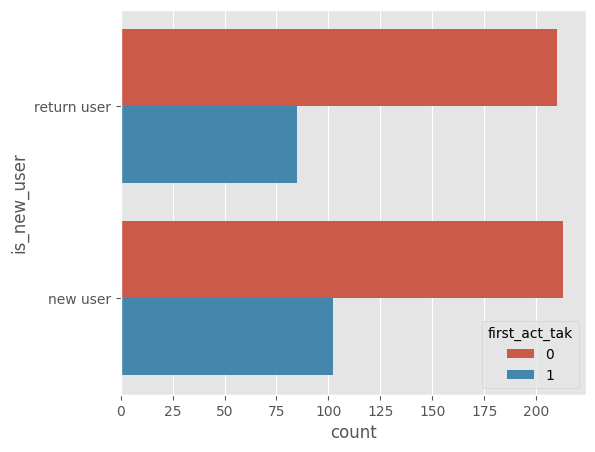

In [59]:
#Create a new binary column for 'First Action Taken'
user_df.loc[:, 'first_act_tak'] = user_df['first_act_tak'].apply(lambda x: 1 if pd.notnull(x) else 0)
returning_user = user_df[user_df['is_new_user'] == 0]
new_user = user_df[user_df['is_new_user'] == 1]

##Perform cross-tabulation
cross_table = pd.crosstab(user_df['is_new_user'], user_df['first_act_tak'])
print(cross_table)

## Conduct chi-square test
chi2, p_value, dof, expected = chi2_contingency(cross_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print(f'With a p-value of {p_value} the difference is significant. We reject the Null Hypothesis.')
else:
    print(f'With a p-value of {p_value} the difference is not significant. We fail to reject the Null Hypothesis')

# Visualization of the collected data:
plt.figure(figsize=(6,5))

yticks_positions = [0, 1]
yticks_labels = ['return user', 'new user']

# Create a FixedLocator for the tick positions
locator = FixedLocator(yticks_positions)
chart = sns.countplot(y = 'is_new_user', hue = 'first_act_tak', data =user_df)

# Set the locator and labels in one step
chart.yaxis.set_major_locator(locator)
chart.set_yticklabels(yticks_labels)



The chi-square test shows that the p-value is 1.0, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis that the user type (returning or new) and the first action taken are independent.

## Relationship between User Type and Signup Source

* Null Hypothesis (H0): There is no association between user type (returning or new) and the signup source.
* Alternative Hypothesis (H1): There is an association between user type (returning or new) and the signup source.

In [60]:
continge_table = pd.crosstab(user_df['is_new_user'], user_df['sign_source'])
chi2, p_value, dof, expected = chi2_contingency(continge_table)
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 2.88
p-value: 0.4104
Degrees of Freedom: 3


## Difference in Tutorial Duration between User Segments

* Null Hypothesis (H0): There is no difference in the tutorial duration among the different user segments.
* Alternative Hypothesis (H1): There is a difference in the tutorial duration among the different user segments.



In [61]:
segments = user_df['sub_type'].unique()
anova_result = f_oneway(*[user_df.loc[user_df['sub_type'] == seg, 'tutorial_duration'] for seg in segments])
print(f"ANOVA F-statistic: {anova_result.statistic:.2f}")
print(f"ANOVA p-value: {anova_result.pvalue:.4f}")#
###
print()

# Create the ANOVA model
model = sm.ols('first_act_tak ~ getting_sta + acc_manag + aud_vid + integration', data=user_df).fit()
anova_table = anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

ANOVA F-statistic: nan
ANOVA p-value: nan

                 sum_sq     df         F    PR(>F)
getting_sta    0.414195    1.0  1.942246  0.163937
acc_manag      0.012429    1.0  0.058284  0.809310
aud_vid        0.239335    1.0  1.122290  0.289849
integration    0.001523    1.0  0.007143  0.932672
Residual     129.019761  605.0       NaN       NaN


The ANOVA test could not be performed because the F-statistic and p-value are not available (nan). The analysis of variance table shows that none of the independent variables (getting_sta, acc_manag, aud_vid, integration) have a significant effect on the first_act_tak variable